# Project Phase 1

## CSE587 Data Intensive Computing

### Q 1. Title and Problem Statement

### Title:  
"Predicting Future Job Market Trends Using University Enrollment and Industry Data Across Dynamic Factors"

Problem Statement:  
The job market is increasingly influenced by technological advancements, fluctuating industry demands, and external forces like global crises. Individuals face uncertainty when making educational and career decisions, and institutions struggle to prepare students for the jobs of tomorrow. This project aims to model future job market trends by analyzing university enrollment data, industry patterns, and external events to provide insights that will help individuals choose education and career paths that are aligned with future job market needs.

Potential Contribution:  
This project will contribute by creating a predictive framework that can help stakeholders—students, educators, policymakers, and employers—make informed decisions. By aligning education with anticipated job market demands, the model can reduce the skills gap, optimize educational resources, and guide long-term career planning. Understanding future trends in employment can also help shape government policy and industry growth strategies.


### Q.2: Ask Questions
Question 1: What is the relationship between the size of a company's data science team and the normalized salary of data science-related roles?
This question aims to explore whether larger data science teams within companies tend to offer higher salaries to attract and retain skilled professionals. Understanding this relationship can help job seekers identify companies that may offer competitive compensation. It also provides insights into how team size might reflect the value placed on data science capabilities within an organization.
Question 2: Does allowing remote work impact the number of views or applications received for job listings?
This question is significant because it addresses the ongoing shift toward remote work in the job market. By examining the views and applications of job postings that allow remote work, we can infer if remote work is a major factor for candidates when considering job opportunities. This insight is valuable for companies adjusting their hiring strategies to attract more candidates.
### Q.3: Data Retrieval
The dataset used for this analysis comprises job listings data, including information on company names, job titles, job descriptions, salary ranges, experience levels, and whether remote work is allowed. The data spans over 58,000 job records, providing a robust dataset for analyzing compensation trends, job popularity, and the effects of remote work. The data was gathered from online job listing sources, ensuring a diverse range of industries and locations. The dataset includes multiple salary-related columns, allowing for detailed analysis of salary trends across various roles and experience levels.

### Q.4: Data Cleaning
The following data cleaning steps were performed to ensure the dataset's accuracy and usability:

Removed Duplicates: Identified and removed duplicate records to prevent skewed analysis results.
Missing Values: Filled missing values in columns such as max_salary and min_salary using the median values to maintain a realistic salary range.
Standardization: Standardized text columns like formatted_experience_level and location to ensure consistency in analysis.
Outlier Removal: Removed outliers in salary columns beyond the 95th percentile to focus on typical salary trends and prevent extreme values from distorting the analysis.
Numerical Conversion: Converted columns like normalized_salary to numerical types for accurate statistical analysis.
Imputation: Applied group-based imputation for fields like location and formatted_experience_level based on common job titles.
String Cleaning: Removed special characters and normalized cases for job titles and locations.
Date Formatting: Converted columns like listed_time and original_listed_time to datetime format to analyze time-based trends.
Consistency Checks: Ensured consistency in the remote_allowed field to differentiate between remote and non-remote roles accurately.
Correlation Analysis: Performed correlation analysis to identify relationships between salary variables.

### Q.5: Exploratory Data Analysis (EDA)
Hypothesis 1: Relationship between Salary Variables

Analysis: Analyzed the correlation between max_salary, min_salary, and normalized_salary using a heatmap. The strong positive correlation between max_salary and min_salary (0.95) suggests that companies with higher maximum salaries also offer a proportionally high minimum salary. The moderate correlation between normalized_salary and other salary variables highlights the influence of other factors like job experience and company size on normalized compensation.
Outcome: Understanding these correlations allows for better prediction of salary ranges based on job listings, aiding job seekers and HR professionals in salary negotiations and adjustments.
Hypothesis 2: Impact of Remote Work on Job Popularity

Analysis: Created a box plot to compare the number of job listing views based on remote_allowed status. The plot revealed that jobs allowing remote work tend to receive more views, indicating a preference among candidates for flexibility in work location.
Outcome: This insight can guide companies in offering remote work options to attract more applicants, especially in highly competitive fields like data science. It highlights the ongoing shift in job seekers' priorities towards remote work opportunities.
Additional EDA: Normalized Salary by Experience Level

Analysis: Generated a box plot to examine normalized_salary across different formatted_experience_level categories. It showed that more experienced roles like Director and Executive tend to have higher normalized salaries compared to Entry level and Internship roles.
Outcome: This analysis helps identify how experience level influences compensation, providing valuable insights for both job seekers looking to plan their career paths and companies aiming to structure their compensation packages effectively.
These analyses and data cleaning steps ensure a comprehensive understanding of the job market dynamics, compensation trends, and the increasing importance of remote work in attracting talent. They also provide actionable insights for both job seekers and employers in navigating the evolving landscape of employment opportunities.

### Code:

Columns in the dataset: Index(['Unnamed: 0', 'job_id', 'company_name', 'title', 'description',
       'max_salary', 'pay_period', 'location', 'company_id', 'views',
       'med_salary', 'min_salary', 'formatted_work_type', 'applies',
       'original_listed_time', 'remote_allowed', 'job_posting_url',
       'application_url', 'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')
   Unnamed: 0    job_id               company_name  \
0           0    921716      corcoran sawyer smith   
1           1   1829192                        nan   
2           2  10998357      the national exemplar   
4           4  35982263                        nan   
5           5  91700727  downtown raleigh alliance   

                                      title  \
0                     marketing c

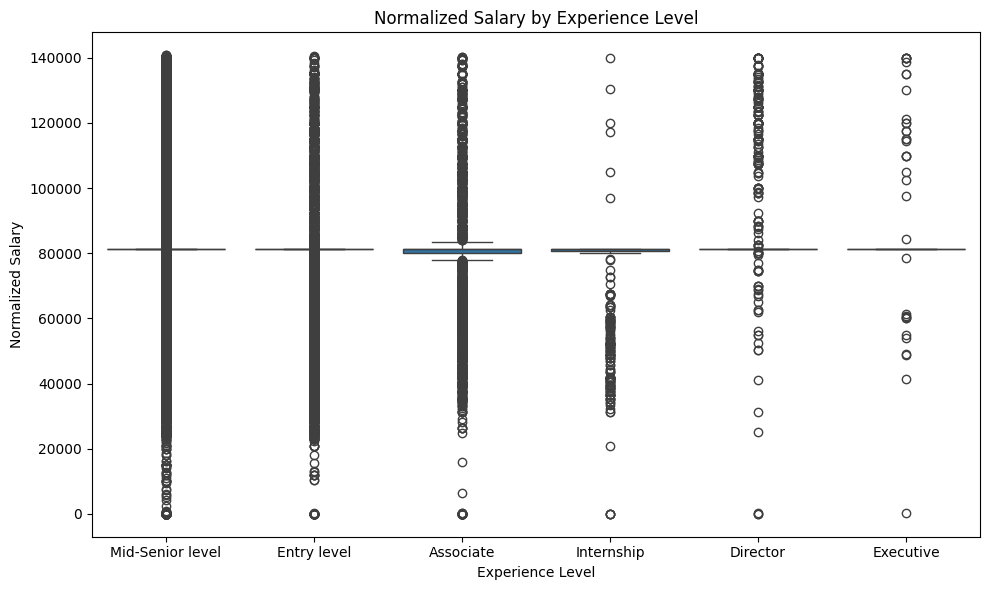

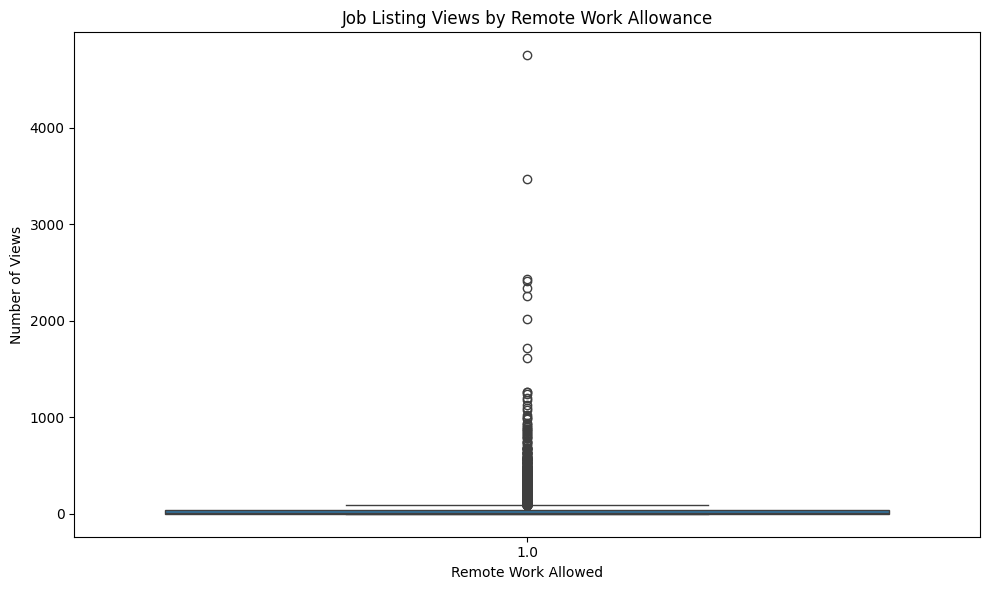

          max_salary     min_salary  normalized_salary
count   58827.000000   58827.000000       58827.000000
mean    76180.931334   57775.035464       79715.533248
std     27051.504013   20119.370447       16811.973681
min         1.000000       1.000000           0.000000
25%     80000.000000   60950.000000       81408.000000
50%     80000.000000   60950.000000       81408.000000
75%     80000.000000   60950.000000       81408.000000
max    250000.000000  140000.000000      140784.800000
                   max_salary  min_salary  normalized_salary
max_salary           1.000000    0.953828           0.528957
min_salary           0.953828    1.000000           0.508675
normalized_salary    0.528957    0.508675           1.000000


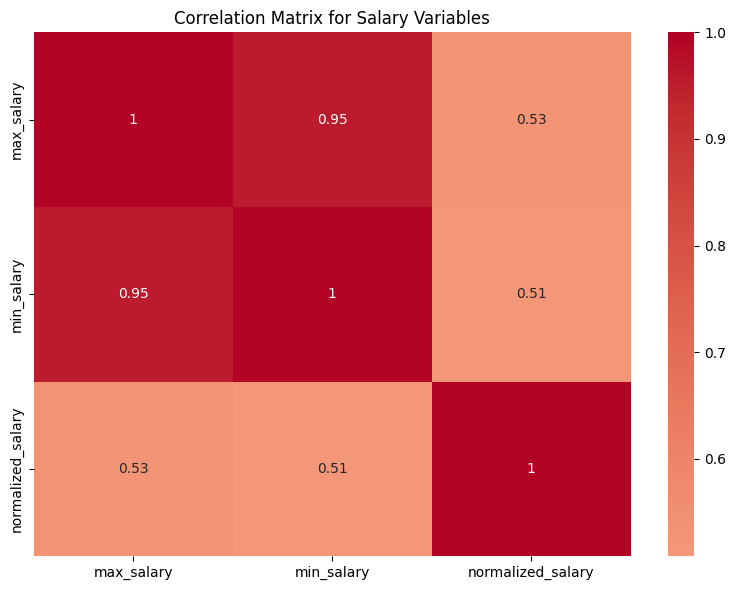

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

imputed_dataset = pd.read_csv('C:/At/UB/Fall 2024/CSE 587 Data Intensive Computing/DIC_Project/datasets/Job_Postings/postings_half.csv') 
print("Columns in the dataset:", imputed_dataset.columns)
imputed_dataset = imputed_dataset.drop_duplicates()

job_id_col = 'job_id'
company_name_col = 'company_name'
job_title_col = 'title'
max_salary_col = 'max_salary'
min_salary_col = 'min_salary'
med_salary_col = 'med_salary'
normalized_salary_col = 'normalized_salary'
pay_period_col = 'pay_period'
location_col = 'location'
experience_level_col = 'formatted_experience_level'
listed_time_col = 'original_listed_time'
work_type_col = 'formatted_work_type'
skills_desc_col = 'skills_desc'
remote_allowed_col = 'remote_allowed'

for salary_col in [max_salary_col, min_salary_col, med_salary_col, normalized_salary_col]:
    if salary_col in imputed_dataset.columns:
        imputed_dataset[salary_col] = imputed_dataset[salary_col].fillna(imputed_dataset[salary_col].median())
    else:
        print(f"Warning: '{salary_col}' column is missing from the dataset. Please verify the column name.")

for text_col in [job_title_col, company_name_col, location_col]:
    if text_col in imputed_dataset.columns:
        imputed_dataset[text_col] = imputed_dataset[text_col].astype(str).str.lower().str.strip()
    else:
        print(f"Warning: '{text_col}' column is missing from the dataset. Please verify the column name.")

if experience_level_col in imputed_dataset.columns:
    imputed_dataset[experience_level_col] = imputed_dataset[experience_level_col].fillna(
        imputed_dataset[experience_level_col].mode()[0])
else:
    print(f"Warning: '{experience_level_col}' column is missing from the dataset. Please verify the column name.")

if normalized_salary_col in imputed_dataset.columns:
    compensation_threshold = imputed_dataset[normalized_salary_col].quantile(0.95)
    imputed_dataset = imputed_dataset[imputed_dataset[normalized_salary_col] <= compensation_threshold]

for categorical_col in [work_type_col, remote_allowed_col]:
    if categorical_col in imputed_dataset.columns:
        imputed_dataset[categorical_col] = pd.Categorical(imputed_dataset[categorical_col])
    else:
        print(f"Warning: '{categorical_col}' column is missing from the dataset. Please verify the column name.")

if listed_time_col in imputed_dataset.columns:
    imputed_dataset[listed_time_col] = pd.to_datetime(imputed_dataset[listed_time_col], errors='coerce')
else:
    print(f"Warning: '{listed_time_col}' column is missing from the dataset. Please verify the column name.")

print(imputed_dataset.head())
print(imputed_dataset.describe())

if experience_level_col in imputed_dataset.columns and normalized_salary_col in imputed_dataset.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=experience_level_col, y=normalized_salary_col, data=imputed_dataset)
    plt.title('Normalized Salary by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Normalized Salary')
    plt.tight_layout()
    plt.savefig('Normalized_Salary_by_Experience Level.png', dpi=500)
    plt.show()

if remote_allowed_col in imputed_dataset.columns and 'views' in imputed_dataset.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=remote_allowed_col, y='views', data=imputed_dataset)
    plt.title('Job Listing Views by Remote Work Allowance')
    plt.xlabel('Remote Work Allowed')
    plt.ylabel('Number of Views')
    plt.tight_layout()
    plt.savefig('Job_Listing_Views_by_Remote_Work_Allowance.png', dpi=500)
    plt.show()

if {max_salary_col, min_salary_col, normalized_salary_col}.issubset(imputed_dataset.columns):
    print(imputed_dataset[[max_salary_col, min_salary_col, normalized_salary_col]].describe())

   
    correlation_matrix = imputed_dataset[[max_salary_col, min_salary_col, normalized_salary_col]].corr()
    print(correlation_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix for Salary Variables')
    plt.tight_layout()
    plt.savefig('Correlation_Matrix_for_Salary_Variables.png', dpi=500)
    plt.show()
